## Intro

In [73]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Matrice originale:

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


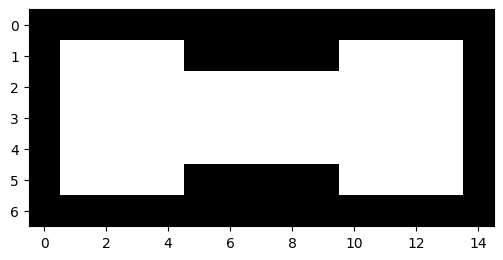

In [74]:
m = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

m = m.astype(np.uint8)

print("Matrice originale:\n")
print(m)
plt.imshow(m)

## Dilation

### Output atteso

In [76]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

In [77]:
dilate_im_exp = cv2.dilate(m, kernel, iterations=1)

### Output sperimentale

In [78]:
def dilation_(image: np.ndarray, kernel: np.ndarray, iterations: int = 1) -> np.ndarray:
    """
    Args:
        image (np.ndarray): Immagine binaria di input.
        kernel (np.ndarray): Elemento strutturale per la dilatazione.
        iterations (int): Numero di iterazioni della dilatazione.

    Returns:
        np.ndarray: Immagine dilatata.
    """

    kernel = kernel.astype(np.uint8)

    result = image.copy()
    height, width = image.shape

    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2

    for _ in range(iterations):
        padded = np.pad(result, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
        output = result.copy()

        for i in range(height):
            for j in range(width):
                if np.any(padded[i:i+k_height, j:j+k_width] & kernel):
                    output[i, j] = 1

        result = output

    return result

In [79]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

In [80]:
dilate_im_ = dilation_(m, kernel)

Matrice attesa post-dilate:

[[0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]]


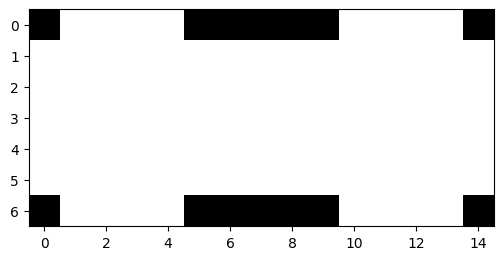

In [81]:
print("Matrice attesa post-dilate:\n")
print(dilate_im_exp)
plt.imshow(dilate_im_exp)

Matrice ottenuta post-dilate implementata:

[[0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 0 0 0 0 1 1 1 1 0]]


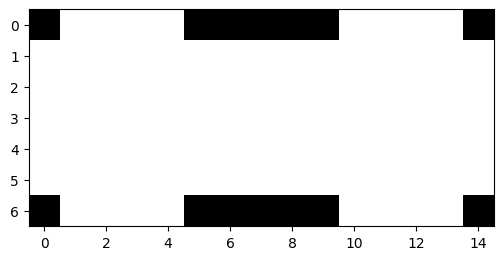

In [82]:
print("Matrice ottenuta post-dilate implementata:\n")
print(dilate_im_)
plt.imshow(dilate_im_)

## Erosion

### Output atteso

In [ ]:
eroded_im_exp = cv2.erode(m, kernel)

### Output sperimentale

In [84]:
def erosion_(image: np.ndarray, kernel: np.ndarray, iterations: int = 1) -> np.ndarray:
    """
    Args:
        image (np.ndarray): Immagine binaria di input.
        kernel (np.ndarray): Elemento strutturale per l'erosione.
        iterations (int): Numero di iterazioni dell'erosione.

    Returns:
        np.ndarray: Immagine erosa.
    """

    kernel = kernel.astype(np.uint8)
    result = image.copy()
    height, width = image.shape

    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2

    for _ in range(iterations):
        padded = np.pad(result, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=1)
        output = result.copy()

        for i in range(height):
            for j in range(width):
                region = padded[i:i+k_height, j:j+k_width]
                if np.array_equal(region * kernel, kernel):
                    output[i, j] = 1
                else:
                    output[i, j] = 0

        result = output

    return result

In [85]:
eroded_im_ = erosion_(m, kernel)

Matrice attesa post-erode:

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


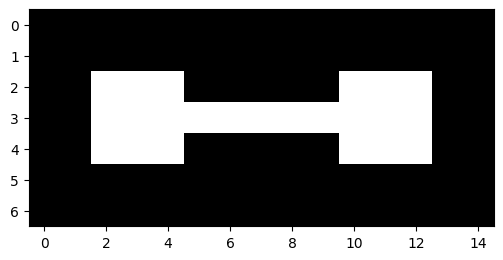

In [86]:
print("Matrice attesa post-erode:\n")
print(eroded_im_exp)
plt.imshow(eroded_im_exp)

Matrice ottenuta post-erode implementata:

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


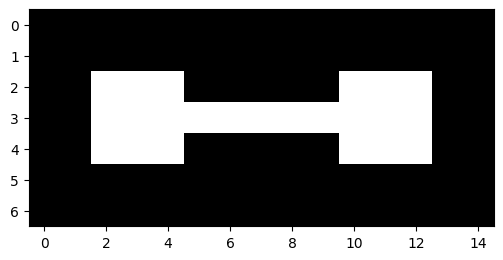

In [87]:
print("Matrice ottenuta post-erode implementata:\n")
print(eroded_im_)
plt.imshow(eroded_im_)

## Test

In [ ]:
# @title
# # Leggo immagine
# im = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)

# print("Immagine originale:\n")
# print(m)
# plt.imshow(im)

# # Calcola l'istogramma
# hist = cv2.calcHist([im], [0], None, [255], [0, 255])

# # Visualizza l'immagine e il suo istogramma
# plt.figure(figsize=(12, 6))

# # Mostra l'immagine originale
# plt.subplot(1, 2, 1)
# plt.title('Immagine in Scala di Grigi')
# plt.imshow(im, cmap='gray')
# plt.axis('off')

# # Mostra l'istogramma
# plt.subplot(1, 2, 2)
# plt.title('Istogramma')
# plt.plot(hist, color='black')
# plt.xlim([0, 255])
# plt.xlabel('Intensità')
# plt.ylabel('Numero di Pixel')

# plt.show()

# def show(im, img, tipo):
#     # Visualizza l'immagine originale e l'immagine
#     plt.figure(figsize=(12, 6))

#     # Mostra l'immagine originale
#     plt.subplot(1, 2, 1)
#     plt.title('Immagine Originale')
#     plt.imshow(im)
#     plt.axis('off')

#     # Mostra l'immagine
#     plt.subplot(1, 2, 2)
#     plt.title(f'Immagine {tipo}')
#     plt.imshow(img)
#     plt.axis('off')

#     plt.show()

# # Applica dilation
# dilated_img = dilation_improved(im, kernel)
# show(im, dilated_img, "dilation_")